<a href="https://colab.research.google.com/github/shivrain/ML/blob/main/SP500_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
#Can run commands directly from yahoo finance

In [ ]:
sp500=yf.Ticker("^GSPC") #Code for s&p500 index

In [ ]:
sp500=sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,0.0,0.0
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,0.0,0.0
2024-06-25 00:00:00-04:00,5460.729980,5472.879883,5446.560059,5469.299805,3591960000,0.0,0.0


In [ ]:
sp500.index #index are the dates here

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-06-13 00:00:00-04:00', '2024-06-14 00:00:00-04:00',
               '2024-06-17 00:00:00-04:00', '2024-06-18 00:00:00-04:00',
               '2024-06-20 00:00:00-04:00', '2024-06-21 00:00:00-04:00',
               '2024-06-24 00:00:00-04:00', '2024-06-25 00:00:00-04:00',
               '2024-06-26 00:00:00-04:00', '2024-06-27 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24238, freq=None)

<Axes: xlabel='Date'>

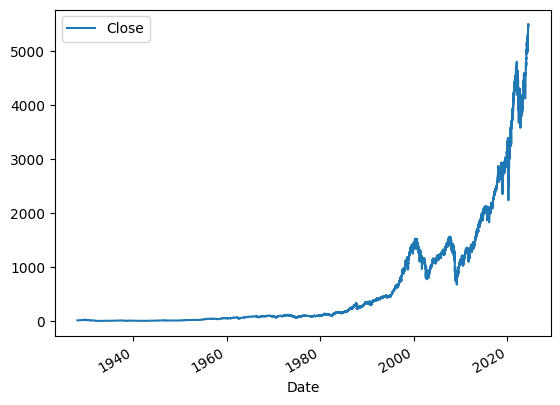

In [ ]:
sp500.plot.line(y="Close",use_index=True) #plot the closing price with index

In [ ]:
del sp500["Dividends"] #remove dividends
del sp500["Stock Splits"] #remove stock splits

Setting up the targer, that is will the price go up or down

We are not that buillish on getting accurate on the abosulte price but rahter on will the price go up or down

In [ ]:
sp500["Tomorrow"]=sp500["Close"].shift(-1)
sp500
#Tomo price is the closing price of that day

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,5469.299805
2024-06-25 00:00:00-04:00,5460.729980,5472.879883,5446.560059,5469.299805,3591960000,5477.899902


In [ ]:
sp500["Target"]=(sp500["Tomorrow"]>sp500["Close"]).astype(int)
sp500
#Boolean to check is the price for tomo is greater than of today, converted to integer for ML purposes

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117,0
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,5469.299805,1
2024-06-25 00:00:00-04:00,5460.729980,5472.879883,5446.560059,5469.299805,3591960000,5477.899902,1


In [ ]:
sp500=sp500.loc["1990-01-01":].copy()
sp500
#Remove historical data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117,0
2024-06-24 00:00:00-04:00,5459.580078,5490.660156,5447.589844,5447.870117,3696750000,5469.299805,1
2024-06-25 00:00:00-04:00,5460.729980,5472.879883,5446.560059,5469.299805,3591960000,5477.899902,1


<Axes: xlabel='Date'>

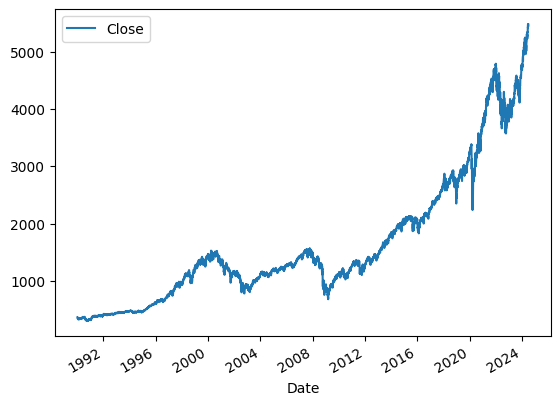

In [ ]:
sp500.plot.line(y="Close",use_index=True)
#Reduced timeline

# Training the intial model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#randomdor.. is randomised and thus it does not usually overfit
#Can pick up non linear relations, which is imp here as stock market doesnt really have linear relations
model=RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)

#n_estimators are the number of decision trees you wanna train. higher the better to a limit, minsample helps in avoiding overfit, higher it avoids overfit but less accurate
#Random state= randomistaion is there, so setting it to 1 makes sure that random numbers are pridctable, so that if we run multiple times we get similar results
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]
#Last 100 calues as test

predictors=["Close","Open","High","Low","Volume"]
model.fit(train[predictors],train["Target"])
#Make sure you dont input tomo or target as you dont want the model to have future data in its disposal

RandomForestClassifier(min_samples_split=10, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])
preds

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import pandas as pd
preds=pd.Series(preds,index=test.index)
preds

Date
2024-02-05 00:00:00-05:00    0
2024-02-06 00:00:00-05:00    1
2024-02-07 00:00:00-05:00    0
2024-02-08 00:00:00-05:00    1
2024-02-09 00:00:00-05:00    0
                            ..
2024-06-21 00:00:00-04:00    0
2024-06-24 00:00:00-04:00    0
2024-06-25 00:00:00-04:00    0
2024-06-26 00:00:00-04:00    0
2024-06-27 00:00:00-04:00    0
Length: 100, dtype: int64

In [ ]:
precision_score(test["Target"],preds)

0.8

<Axes: xlabel='Date'>

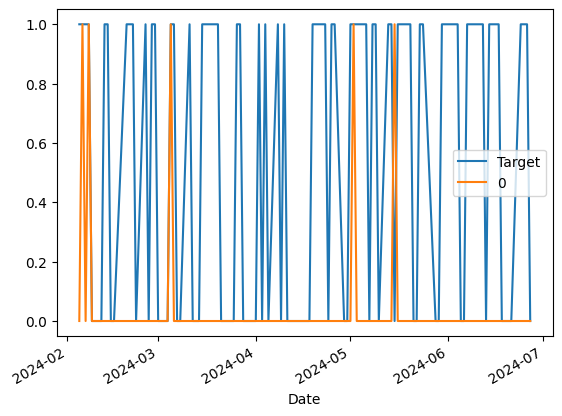

In [ ]:
combined= pd.concat([test["Target"],preds],axis=1)
combined.plot()
#orange are our predictions

Backtesting

In [ ]:
def predict (train,test,predictors,model):
  model.fit(train[predictors],train["Target"])
  preds=model.predict(test[predictors])
  preds=pd.Series(preds,index=test.index,name="Predictions")
  combined=pd.concat([test["Target"],preds],axis=1)
  return combined

#Whatver we have done till now in a function

In [ ]:
def backtest(data,model,predictors,start=2500,step=100):
  all_predictions=[]

  for i in range(start,data.shape[0],step):
    train=data.iloc[0:i].copy()
    test=data.iloc[i:(i+step)].copy()
    predictions=predict(train,test,predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)


In [ ]:
predictions = backtest(sp500,model,predictors)
predictions["Predictions"].value_counts()

KeyboardInterrupt: 

In [ ]:
precision_score[predictions["Predictions"],predictions["Target"]

In [ ]:
predictions["Target"].value_counts()/predictions.shape[0]